# Linear and Nonlinear Optimization

![Tokyo Woman's Christian University (TWCU)](res/twcu_logo.png)

- Kai Torben OHLHUS
  - email: <ohlhus@lab.twcu.ac.jp>
- Winter 2021
- Last update: 2021-09-20
  
> This optimization course is based on lecture material by
> [C. Jansson](https://www.tuhh.de/ti3/jansson/) and
> [H. Oberle](https://www.math.uni-hamburg.de/home/oberle/skripte/optimierung.html).

## Introduction

This one semester course is prepared for students
of engineering and computer science.
It will introduce the **classical optimization methods**.
The topics covered in this course include:

- Optimality conditions for finite-dimensional (un-)constrained continuous problems
- (Un-)constrained optimization methods
- Convex analysis
- Many examples

Duration: 14 weeks, 1.5 hours per week

**Prerequisites: Knowledge of elementary Calculus and Linear Algebra.**

> **Please note:** these lecture notes are **not complete**.
> Several additional parts, comments, proofs, and intermediate calculations
> are given on the blackboard.

## Literature

- Cottle, Thapa:
  *Linear and Nonlinear Optimization*,
  Springer, 2017.
  [doi:10.1007/978-1-4939-7055-1](https://doi.org/10.1007/978-1-4939-7055-1)
  (ISBN: 978-1-4939-7053-7)

- Luenberger, Ye:
  *Linear and Nonlinear Programming*,
  Springer, 2016.
  [doi:10.1007/978-3-319-18842-3](https://doi.org/10.1007/978-3-319-18842-3)
  (ISBN: 978-3-319-18841-6)

- Bertsekas:
  *Nonlinear Programming*,
  Athena Scientific, 2016.
  <http://www.athenasc.com/nonlinbook.html>
  (ISBN: 978-1-886529-05-2)

- Griva, Nash, Sofer:
  *Linear and Nonlinear Optimization*,
  SIAM, 2008.
  <http://bookstore.siam.org/OT108/>
  (ISBN: 978-0-89871-661-0)

- Boyd, Vandenberghe:
  *Convex Optimization*,
  Cambridge University Press, 2004.
  <https://web.stanford.edu/~boyd/cvxbook/>
  (ISBN: 978-0-521-83378-3)

## The optimization problem

$$
\begin{array}{lll}
\textrm{minimize}   & f(x)             & \\
\textrm{subject to} & f_{i}(x) \leq 0, & i = 1, \ldots, m, \\
                    & h_{j}(x) =    0, & j = 1, \ldots, p, \\
\end{array}
$$

- $x = (x_{1}, x_{2}, \ldots)$:
  **optimization variables**

- $f \colon \mathcal{X} \to \mathbb{R}$:
  **objective function** (目的関数)

- $g_{i} \colon \mathcal{X} \to \mathbb{R}, i = 1, \ldots, m$:
  **inequality constraint** functions

- $h_{j} \colon \mathcal{X} \to \mathbb{R}, j = 1, \ldots, p$:
  **equality constraint** functions

Decision set $\mathcal{X}$ may be finite $\mathbb{R}^{n}$,
a set of matrices,
a discrete set $\mathbb{Z}^{n}$,
or an infinite dimensional set.

The **constraint functions** (制約関数) limit the decision set $\mathcal{X}$
to a set of **feasible points** (実行可能領域) $x \in X \subset \mathcal{X}$.

> **Optimal solution** (最適解) $\forall x \in X \colon f(x^{*}) \leq f(x)$.
>
> The Optimal solution $x^{*} \in X$ has smallest value of $f$
> among all feasible points that "satisfy the constraints".

### Classes of optimizations problems

- Unconstrained optimization: $m = p = 0$
- Constrained optimization $m > 0$ or $p > 0$
- Linear Programming: $f$ linear, $g_{i}$, $h_{j}$ affin-linear
- Quadratic Programming: $f(x) = \frac{1}{2}x^{T}Ax + b^{T}x +c$, $g_{i}$, $h_{j}$ affin-linear
- Convex Optimization: $f$ convex, $g_{i}$ convex, $h_{j}$ affin-linear

### Local and global optima

Consider the following piecewise defined function:

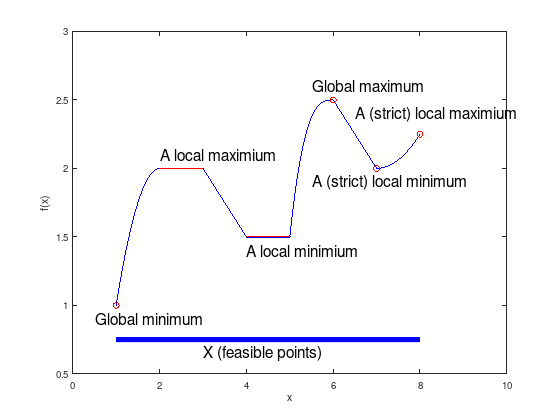

In [13]:
f = {@(x) -(x - 2).^2 + 2, ...
     @(x) 2, ...
     @(x) -(x - 7) / 2, ...
     @(x) 3/2, ...
     @(x) (x - 6).^3 + 5/2, ...
     @(x) -(x - 11) / 2, ...
     @(x) (x - 7).^2 / 4 + 2};
for i = 1:7
  fun = f{i};
  x = linspace (i, i + 1, 40);
  y = fun (x);
  plot (x, y, 'b');
  hold on;
end
xlim ([0, 10]);
ylim ([0.5, 3]);
xlabel ('x');
ylabel ('f(x)');
fmt = {'FontSize', 16};
plot (1, 1.00, 'ro'); text (0.5, 0.9, 'Global minimum', fmt{:});
plot (6, 2.50, 'ro'); text (5.5, 2.6, 'Global maximum', fmt{:});
plot (7, 2.00, 'ro'); text (5.5, 1.9, 'A (strict) local minimum', fmt{:});
plot (8, 2.25, 'ro'); text (6.5, 2.4, 'A (strict) local maximium', fmt{:});
plot (2:3, [2, 2],     'r'); text (2, 2.1, 'A local maximium', fmt{:});
plot (4:5, [3, 3] / 2, 'r'); text (4, 1.4, 'A local minimium', fmt{:});
plot ([1, 8], [0.75, 0.75], 'b', 'LineWidth', 6);
text (3, 0.65, 'X (feasible points)', fmt{:});

Local and global optima of a two-dimensional function.

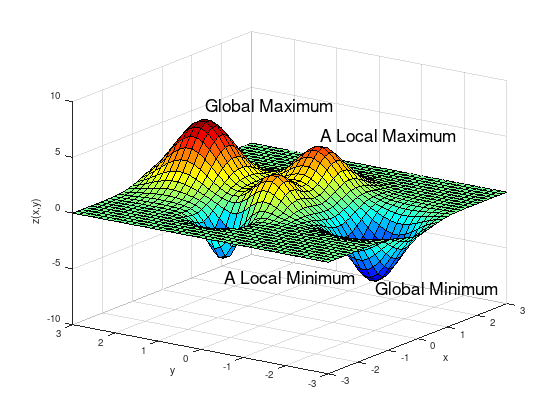

In [1]:
N = 3;
[X,Y] = meshgrid (linspace (-N, N, 40));

% Gaussian probability density function (PDF)
GAUSS = @(sigma, mu)  1 / (sigma * sqrt (2*pi)) * ...
                      exp (-0.5 * ((X - mu(1)).^2 + (Y - mu (2)).^2) / sigma^2);

Z = 9 * GAUSS (0.6, [ 0.0,  2.0]) + 5 * GAUSS (0.5, [ 1.0,  0.0]) ...
  + 3 * GAUSS (0.4, [-0.5,  0.0]) - 3 * GAUSS (0.3, [-1.5,  0.5]) ...
  - 7 * GAUSS (0.5, [ 0.0, -2.0]);

surf (X, Y, Z);
xlabel ('x');
ylabel ('y');
zlabel ('z(x,y)');
colormap ('jet');
props = {'FontSize', 18};
text ( 0.0, -2.0, -6.2, 'Global Minimum', props{:});
text ( 0.0,  2.0,  7.2, 'Global Maximum', props{:});
text (-1.5,  0.5, -5.5, 'A Local Minimum', props{:});
text ( 1.0,  0.0,  5.0, 'A Local Maximum', props{:});
view (-55, 21)

### Two-dimensional constrained example

A simple problem can be defined by the constraints
$$
\begin{array}{l}
x_1 \geq 0, \\
x_2 \geq 0, \\
x_1^2 + x_2^2 \geq 1, \\
x_1^2 + x_2^2 \leq 2,
\end{array}
$$
with an objective function to be maximized
$$
f(x) = x_1 + x_2
$$

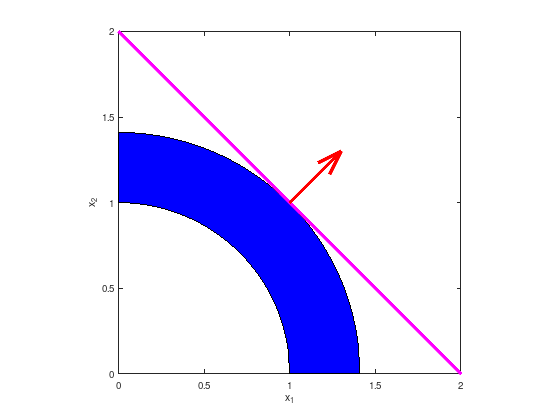

In [30]:
% Visualize constrained set of feasible solutions (blue).
circ = @(x) sqrt (max(x)^2 - x.^2);
x_11 = 0:0.01:sqrt(2);
x_21 = circ (x_11);
x_12 = 1:-0.01:0;
x_22 = circ (x_12);
area ([x_11, x_12], [x_21, x_22], 'FaceColor', 'blue');

% Visualize level set of the objective function (magenta)
% and its scaled gradient (red arrow).
hold on;
plot ([0 2], [2 0], 'LineWidth', 4, 'm');
quiver (1, 1, 0.3, 0.3, 'LineWidth', 4, 'r');
axis equal
xlim ([0 2])
ylim ([0 2])
xlabel ('x_1')
ylabel ('x_2')

The intersection of the level-set of the objective function ($f(x) = 2 = const.$)
and the constrained set of feasible solutions represents the solution.

> $\max f(x) = -\min -f(x)$

In these lectures we are mainly interested in methods for computing local minima.

### Applications, examples and software

Good ressource is the homepage by Hans D. Mittelman:
<http://plato.asu.edu/guide.html>.

- **problems/software:** software sorted by problem to be solve
- **benchmarks:** collection of test results and performance tests
- **test cases:** example files ready to use with existing software, in different formats
- **books/tutorials:** a short list of introductory texts, some online
- **tools:** software which helps formulating an optimization problem or simplifying its solution

### Modelling

- **Real world problem:** mathematical formulation, preferable as a tractable (linear or convex) problem.
- **Software:** try to classify the problem, in order to find the appropriate software.
- **Solution:** depends on your choice of the mathematical model, and the input data.

Nearly all scientific and engineering fields make knowingly or unknowingly use of some kind of optimization techiques. 
Starting with "Operations Research", "Machine Learning", ... It is superfluous to write them all down.

Even nature optimizes.
The basic laws of nature can be formulated in terms of least action principles.
Therefore only two small examples with typical properties.

### Notation

Vectors $x \in \mathbb{R}^{n}$ are column vectors.
$x^{T}$ is the transposed row vector.

A norm in $\mathbb{R}^{n}$ is denoted by $\lVert \cdot \rVert$
and corresponds to the Euclidean norm:

$$
\lVert x \rVert = \lVert x \rVert_{2} = \left( x^{T}x \right)^{\frac{1}{2}}
= \sqrt{x_{1}^{2} + \ldots + x_{n}^{2}}.
$$

Is $\lVert \cdot \rVert$ a norm on $\mathbb{R}^{n}$, then

$$
\lVert A \rVert := \max\left\{ \lVert Ax \rVert \colon \lVert x \rVert \leq 1 \right\}
$$

defines the matrix norm (operator norm) for $A \in \mathbb{R}^{n \times n}$.

For the Euclidean vector norm this is

$$
\lVert A \rVert = \sqrt{\lambda_{\max}(A^{T}A)} = \sigma_{\max}(A),
$$

where $\lambda_{\max}(\cdot)$ denotes the maximal eigenvalue
and $\sigma_{\max}(\cdot)$ the maximal singular value of a matrix.

The open ball with center $x \in \mathbb{R}^{n}$ and radius $\varepsilon > 0$
is denoted by

$$
B_{\varepsilon}(x) := \{ y \in \mathbb{R}^{n} \colon \lVert y - x \rVert < \varepsilon \}.
$$

The interior of a set $X \subset \mathbb{R}^{n}$ is denoted by $int(X)$
and the border by $\partial X$.
For $x \in int(X)$ and $\varepsilon > 0$ there is $B_{\varepsilon}(x) \subset X$.

A subset $X \subset \mathbb{R}^{n}$ is called **"open"**, if $int(X) = X$.
("The border $\partial X$ is not included.")

A closed subset $X \subset \mathbb{R}^{n}$ is called **"compact"**,
if every open cover of $X$ has a finite subcover.
("No holes in $X$, border included.").

Let $f \colon \mathbb{R}^{n} \to \mathbb{R}$ be continuously differentiable
($f \in C^{1}$), then the **gradient** of $f$ in $x$ is denoted by
the column vector:

$$
\nabla f(x) =
\begin{pmatrix}
\dfrac{\strut\partial}{\strut\partial x_{1}} f(x) \\
 \vdots \\
\dfrac{\strut\partial}{\strut\partial x_{n}} f(x)
\end{pmatrix}
$$

Let $f \colon \mathbb{R}^{n} \to \mathbb{R}$ be twice continuously differentiable
($f \in C^{2}$), then the symmetric **Hessian matrix** of $f$ in $x$ is denoted by:

$$
\nabla^{2} f(x) =
\begin{pmatrix}
\dfrac{\strut\partial^{2}}{\strut\partial x_{1}\strut\partial x_{1}} f(x)
& \cdots
& \dfrac{\strut\partial^{2}}{\strut\partial x_{1}\strut\partial x_{n}} f(x) \\
\vdots & \ddots & \vdots \\
\dfrac{\strut\partial^{2}}{\strut\partial x_{n} \strut\partial x_{1}} f(x)
& \cdots
& \dfrac{\strut\partial^{2}}{\strut\partial x_{n} \strut\partial x_{n}} f(x)
\end{pmatrix}
$$

A real symmetric matrix $A \in \mathbb{R}^{n \times n}$ is positive semi-definte,
if $d^{T}Ad \geq 0$ for all $d \in \mathbb{R}^{n} \setminus \{ 0 \}$
and is denoted by $A \succeq 0$.

A real symmetric matrix $A \in \mathbb{R}^{n \times n}$ is positive definte,
if $d^{T}Ad > 0$ for all $d \in \mathbb{R}^{n} \setminus \{ 0 \}$
and is denoted by $A \succ 0$.

The **Landau symbol** is defined by

$$
\phi(d) = o\left(\lVert d \rVert^{k}\right)
\iff \lim_{d \to 0} \frac{\phi(d)}{\lVert d \rVert^{k}} = 0.
$$

**Taylor's theorem** (only linear and quadratic)

Let $f \in C^{1}$, $X \subset \mathbb{R}^{n}$ open, $x \in X$, $d \in \mathbb{R}^{n}$
and $\lVert d \rVert$ sufficiently small, then:

$$
f(x + d) = f(x) + \nabla f(x)^{T}d + o(\lVert d \rVert).
$$

Additionally, if $f \in C^{2}$ and for $0 < \theta < 1$,
the remainder is expressible by

$$
f(x + d) = f(x) + \nabla f(x)^{T}d + \frac{1}{2}d^{T}\nabla^{2} f(x + \theta d)d.
$$

Let $f \in C^{2}$, $X \subset \mathbb{R}^{n}$ open, $x \in X$, $d \in \mathbb{R}^{n}$
and $\lVert d \rVert$ sufficiently small, then:

$$
f(x + d) = f(x) + \nabla f(x)^{T}d + \frac{1}{2}d^{T}\nabla^{2} f(x)d + o(\lVert d \rVert^{2}).
$$

## Extreme value theorem

> Let $X \subset \mathbb{R}^{n}$ non-empty and compact
> and $f \colon \mathbb{R}^{n} \to \mathbb{R}$ continous.
> Then there exists a **global minimum** of $f$ over $X$.

If a real-valued function $f$ is continuous on the closed interval $[a,b]$,
then $f$ must attain a maximum and a minimum, each at least once!

## Necessary conditions for a local minimum

### 1st order optimality condition

Zero slope at a local minimum $x^{*}$:

$$
\nabla f(x^{*}) = 0
$$

> Let the open set $X \subset \mathbb{R}^{n}$ and let $f \in C^{1}$.
> If the point $x^{*} \in X$ is a local miminum of $f$ over $X$,
> then $\nabla f(x^{*}) = 0$.

*Proof:*
Let $d \in \mathbb{R}^{n} \setminus \{0\}$.
Because $X$ is an open set and $x^{*}$ is a local minimum
$x^{*} + td \in X$, 
$x^{*} - td \in X$,
$f(x^{*} + td) - f(x^{*}) \geq 0$, and
$f(x^{*} - td) - f(x^{*}) \geq 0$
hold for sufficiently small $t > 0$.
Because $f \in C^{1}$ it follows
$$
0 \leq \lim_{t \to +0}
\frac{f(x^{*} + td) - f(x^{*})}{t} = \nabla f(x^{*})^{T}d
$$
and
$$
0 \leq \lim_{t \to +0}
\frac{f(x^{*} - td) - f(x^{*})}{t} = -\nabla f(x^{*})^{T}d
$$
and it follows $\nabla f(x^{*}) = 0$.

$$
\tag*{$\Box$}
$$

### 2st order optimality condition

Nonnegative curvature at a local minimum $x^{*}$:

$$
\nabla^{2} f(x^{*}) \quad\text{is positive semi-definite}
$$

> Let the open set $X \subset \mathbb{R}^{n}$ and $f \in C^{2}$.
> If the point $x^{*} \in X$ is a local miminum of $f$ over $X$,
> then the Hessian matrix $\nabla^{2} f(x^{*})$ is positive semi-definite.

*Proof:*
Let $d \in \mathbb{R}^{n} \setminus \{0\}$ and $|t|$ sufficiently small
(such that $x^{*} + td \in X$ for all $t$ with $|t| < t_{0}$).

Using Taylor's theorem (differentiation with chain-rule)
and regarding $\nabla f(x^{*}) = 0$ gives

$$
f(x^{*} + td) = f(x^{*}) + \frac{1}{2}t^{2}d^{T}\nabla^{2} f(x^{*})d + o(t^{2}).
$$

If $\nabla^{2} f(x^{*})$ was not positive semi-definite,
there exists a $d \in \mathbb{R}^{n} \setminus \{0\}$
with $d^{T}\nabla^{2} f(x^{*})d < 0$.
This is a contradiction for the minimality of $x^{*}$.

$$
\tag*{$\Box$}
$$

**Remark:** There may exist points that satisfy the **necessary** 1st and 2nd order conditions
but are not local minima.  For example:

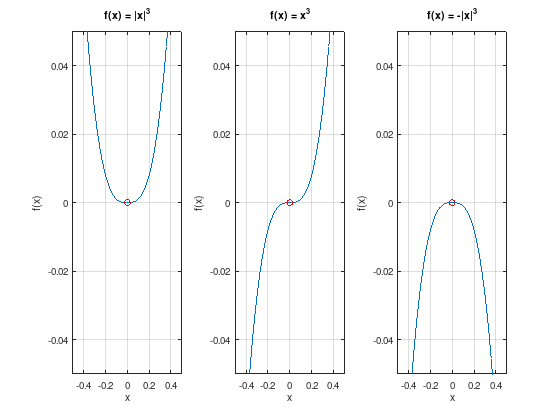

In [7]:
x = linspace (-0.5, 0.5, 50);
fstr = {'|x|^3', 'x^3', '-|x|^3'};
f = {@(x) abs(x).^3, @(x) x.^3, @(x) -abs(x).^3};
for i = 1:3
  fun = f{i};
  subplot (1, 3, i);
  plot (x, fun(x));
  hold on;
  plot (0, 0, 'ro');
  grid on;
  xlim ([-0.5, 0.5]);
  ylim ([-0.05, 0.05]);
  xlabel ('x');
  ylabel ('f(x)');
  title (['f(x) = ', fstr{i}]);
end

## Sufficient condition for a strict local minimum

Positive curvature at a local minimum $x^{*}$:

$$
\nabla^{2} f(x^{*}) \quad\text{is positive definite}
$$

> Let $f \in C^{2}$ and $x^{*} \in X \subset \mathbb{R}^{n}$ with
> $\nabla f(x^{*}) = 0$ and $\nabla^{2} f(x^{*}) \succeq 0$ (positive definite),
> then $x^{*}$ is a strict local minimum of $f$ over $X$.

*Proof:*
Application of the Rayleigh–Ritz method,
for symmetric matrix $A \in \mathbb{R}^{n \times n}$
and $d \in \mathbb{R}^{n} \setminus \{ 0 \}$ there is

$$
\lambda_{\min}(A) \leq \frac{d^{T}Ad}{d^{T}d} \leq \lambda_{\max}(A),
$$

where the minimum or maximum is attained
for the respective eigenvectors $d$ of the minimal and maximal eigenvalue.

For a positive definite, symmetric matrix $A = \nabla^{2} f(x^{*})$
there is $\lambda := \lambda_{\min}(A) > 0$:

$$
d^{T}\nabla^{2} f(x^{*}) d \geq \lambda \lVert d \rVert_{2}^{2},
\qquad\forall d \in \mathbb{R}^{n}.
$$

Applying Taylor's theorem to $f$ at $x^{*}$ (with remainder) gives

$$
f(x^{*} + d) = f(x^{*}) + \nabla f(x^{*})^{T}d + \frac{1}{2}d^{T} \nabla^{2} f(\tilde{x})d
$$

with $\tilde{x} := x^{*} + \theta d$, $0 < \theta < 1$.

Using $\nabla f(x^{*}) = 0$ and an expansion:

$$
\begin{aligned}
f(x^{*} + d) &= f(x^{*})
+ \frac{1}{2}\underbrace{d^{T} \nabla^{2} f(x^{*})d}_{\geq \lambda \lVert d \rVert_{2}^{2}}
+ \frac{1}{2}\underbrace{d^{T} (\nabla^{2} f(\tilde{x}) - \nabla^{2} f(x^{*}))d}_{\text{Cauchy-Schwarz inequality}} \\
&\geq f(x^{*}) + \frac{1}{2} (\lambda - \lVert \nabla^{2} f(\tilde{x}) - \nabla^{2} f(x^{*}) \rVert_{2}) \lVert d \rVert_{2}^{2}
\end{aligned}
$$

Because the Hessian matrix is continuous,
there is $f(x^{*} + d) > f(x^{*})$ for all $d \neq 0$ with a sufficiently small norm.

$$
\tag*{$\Box$}
$$

**Remark:** The suffient condition is not necessary.
See for example $f(x) = x_{1}^{2} + x_{2}^{4}$.
$x = 0$ is a strict local minimum, however, the Hessian matrix is not positive definite.